# EJERCICIO 4: ASORTATIVIDAD

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pylab as plt
%matplotlib inline
import os                       # importamos las librerias necesarias
from random import shuffle
import pandas as pd
from scipy import optimize
import math

# (A) Considere la red de colaboraciones científicas y la red de internet. Analice si la red es asortativa o disortativa respecto al grado.

# i. Determine, para nodos de grado k, cuánto vale en media el grado de sus vecinos.

In [2]:
G = nx.read_gml('netscience.gml')     # definimos las redes
H = nx.read_gml('as-22july06.gml')

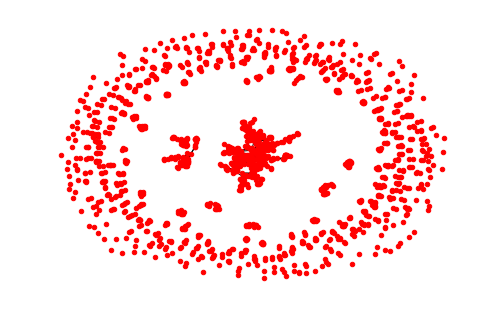

In [3]:
nx.draw(G,node_size=20)
plt.figure(figsize=(20,20))    #graficamos la red G para hacer un analisis cualitativo

A partir de observar el grafo de esta red, se aprecia que los nodos se vinculan con los que tienen su mismo grado. Nuestra hipótesis es entonces, que la red de colaboraciones científicas será asortativa.

In [4]:
def gradoprimerosvecinos(G):
    degree =[float(degree) for node,degree in G.degree()] #lista con los grados de cada nodo
    A_G=nx.adjacency_matrix(G) # matriz de adyacencia
    kmean=A_G.dot(degree)  # cantidad de enlaces que tienen los primeros vecinos de cada nodo del grafo 
    
    for k in range(len(kmean)):
        if degree[k]!=0:
            kmean[k]=kmean[k]/degree[k] # valor medio del grado de los primeros vecinos del nodo k
        else:
            kmean[k]=0
    plt.loglog(degree,kmean,'.')  # grafico en escala logaritmica grado vs kmean
    plt.xlabel('grado k')
    plt.ylabel('grado medio de primeros vecinos')
    return [degree,kmean]

# ii. Analizar la tendencia observada en un gráfico que consigne dicho valor $k_{nn}(k)$ como función del grado.

Text(0.5,1,'Red de colaboraciones científicas')

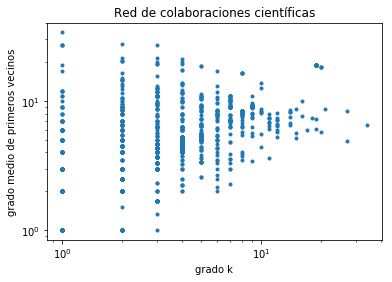

In [5]:
[degreeG,kmeanG]=gradoprimerosvecinos(G)
plt.title('Red de colaboraciones científicas')

Text(0.5,1,'Red de Internet')

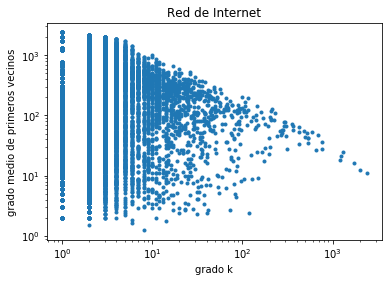

In [6]:
[degreeH,kmeanH]=gradoprimerosvecinos(H)
plt.title('Red de Internet')

Los gráficos de arriba muestran para cada nodo de grado k, cual es el valor medio del grado de sus primeros vecinos. Como tenemos muchos nodos para cada grado, realizaremos el promedio por grado.

In [7]:
def bineonormal(G,degree,kmean):
    k_ordenado=sorted(degree)
    degree_arr_int = np.array(list(sorted(set([int(degree) for node,degree in G.degree()]))))
    kmm = np.zeros(len(degree_arr_int))
    for i,d in enumerate(degree_arr_int):
        kmm[i]=np.mean(kmean[degree==d])
    plt.figure(figsize=(15,4))
    plt.subplot(1, 2, 1) 
    plt.plot(degree_arr_int,kmm,'.')
    plt.xlabel('grado k')
    plt.ylabel('media de grado medio de primeros vecinos')
    plt.subplot(1, 2, 2)
    plt.loglog(degree_arr_int,kmm,'.')
    plt.xlabel('grado k')
    plt.ylabel('media de grado medio de primeros vecinos')
    
    return [degree_arr_int,kmm]

Text(0.25,23,'Red de colaboraciones científicas')

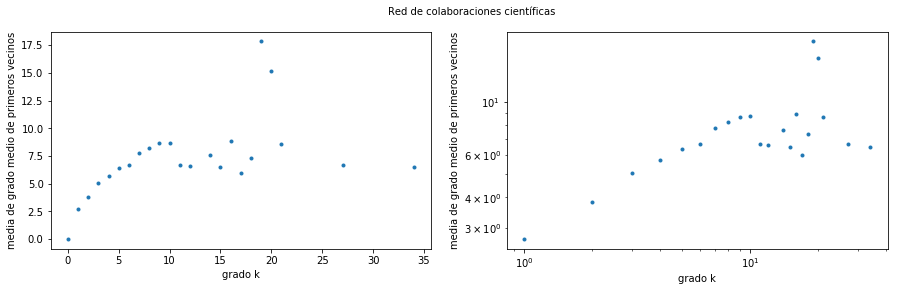

In [8]:
[degree_arr_intG,kmmG]=bineonormal(G,degreeG,kmeanG)
plt.text(0.25,23,'Red de colaboraciones científicas')

Text(0.1,1000,'Red de Internet')

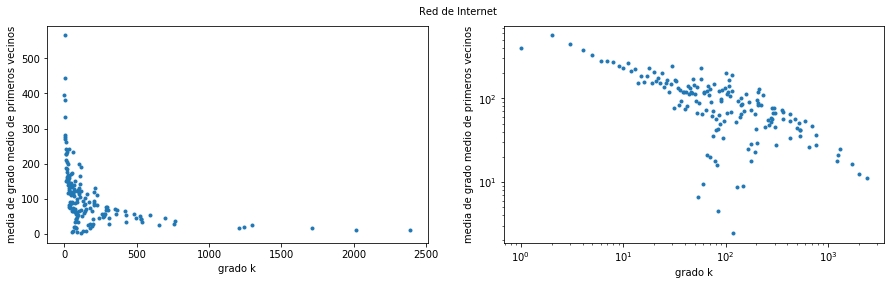

In [9]:
[degree_arr_intH,kmmH]=bineonormal(H,degreeH,kmeanH)
plt.text(0.1,1000,'Red de Internet')

# iii. Asumiendo que $k_{nn}(k) = a k^{\mu}$ , estime el exponente de correlación a partir de realizar una regresión de log 𝑘𝑛𝑛 ~ log 𝑘. Asegurese de graficar el fiteo en el grafico anterior.

Se realizará un ajuste de los graficos como una ley de potencias. Para ello definimos la función 'ajustelineal' que transforma la funcion de potencias  y = a * x^b en una función lineal a partir de tomar el logaritmo: log(y) = log(a) + b*log(x)

In [10]:
def ajustelineal(ejex,ejey):
##########
# Fitting data -- Least Squares Method
##########
    powerlaw = lambda x, amp, index: amp * (x**index)
# Power-law fitting is best done by first converting
# to a linear equation and then fitting to a straight line.
# Note that the `logyerr` term here is ignoring a constant prefactor.
#
#  y = a * x^b
#  log(y) = log(a) + b*log(x)
#
    yerr=np.zeros(len(ejey))

    logx = np.log10(ejex)
    logy = np.log10(ejey)
    logyerr = np.ones(len(ejey))


# define our (line) fitting function
    fitfunc = lambda p, x: p[0] + p[1] * x
    errfunc = lambda p, x, y, err: (y - fitfunc(p, x)) / err

    pinit = [1.0, -1.0]
    out = optimize.leastsq(errfunc, pinit,args=(logx, logy, logyerr), full_output=1)


    pfinal = out[0]
    covar = out[1]
   # print(pfinal)
    #print(covar)

    index = pfinal[1]
    amp = 10.0**pfinal[0]

    indexErr = np.sqrt( covar[1][1] )
    ampErr = np.sqrt( covar[0][0] ) * amp

##########
# Plotting data
##########

    plt.clf()
    plt.figure(figsize=(15,4))
    plt.subplot(1, 2, 1)
    plt.plot(ejex, powerlaw(ejex, amp, index))     # Fit
    plt.errorbar(ejex,ejey, yerr=yerr, fmt='k.')  # Data
   # plt.text(8.5, 3.5, 'Ampli = %5.2f +/- %5.2f' % (amp, ampErr))
    #plt.text(8.5, 3.5, 'Index = %5.2f +/- %5.2f' % (index, indexErr))
    plt.title('Index = %5.2f +/- %5.2f' % (index, indexErr))
    plt.xlabel('X')
    plt.ylabel('Y')
    #plt.xlim(1, 2500)

    plt.subplot(1, 2, 2)
    plt.loglog(ejex, powerlaw(ejex, amp, index))
    plt.errorbar(ejex, ejey, yerr=yerr, fmt='k.')  # Data
    plt.xlabel('X (log scale)')
    plt.ylabel('Y (log scale)')
    plt.title('Best Fit Power Law')
    #plt.xlim(1.0, 2500)

Text(0.25,23,'Red de colaboraciones científicas')

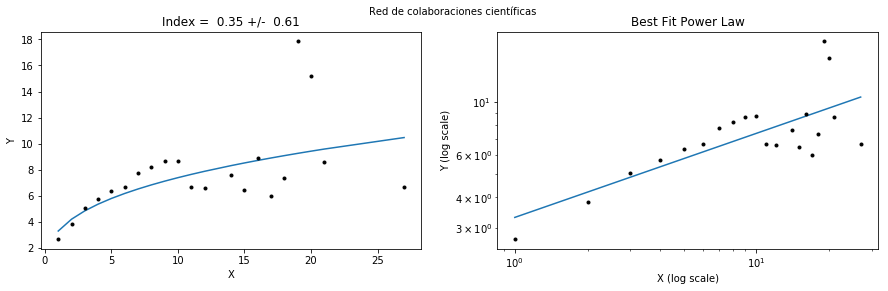

In [11]:
ajustelineal(degree_arr_intG[1:-1],kmmG[1:-1])
plt.text(0.25,23,'Red de colaboraciones científicas')

Text(0.1,1000,'Red de Internet')

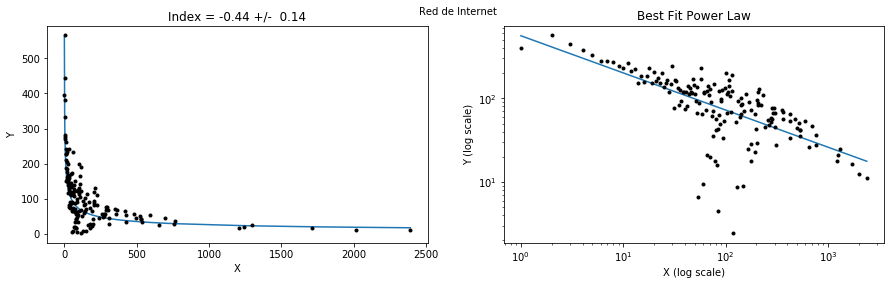

In [12]:
ajustelineal(degree_arr_intH,kmmH)
plt.text(0.1,1000,'Red de Internet')

Para la red de Internet, se tiene una 'nube' de puntos en el orden 10^2 de grado de nodos. Pensamos que si hacemos un bineo logarítmico en grados, obtendremos un gráfico más respresentativo independiente de escala.

In [13]:
def bineologaritmico(G,degree,kmean,i_max):

    serie2=[]
    serie2.append(0)
    for kk in range(i_max):
        serie2.append(serie2[kk]+2**kk)
    
    q=[]
    p=[]
    for i in range(len(serie2)):
        jdg=[]
        xxx=[]
        for j in range(len(degree)):
            if 0<=degree[j]-serie2[i]<2**i:
                xxx.append(degree[j])
                jdg.append(kmean[j])
        p.append(np.mean(xxx))
        q.append(np.mean(jdg))
    
    ejey=q[1:]
    ejex=p[1:] #le asignamos el grado promedio de los grados que 'caen' e esa celda
    plt.figure(figsize=(15,4))
    plt.subplot(1, 2, 1) 
    plt.plot(ejex,ejey,'.')
    plt.subplot(1, 2, 2)
    plt.loglog(ejex,ejey,'.')
    
    return [ejex,ejey]

/home/juani/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/juani/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.1,1000,'Red de Internet')

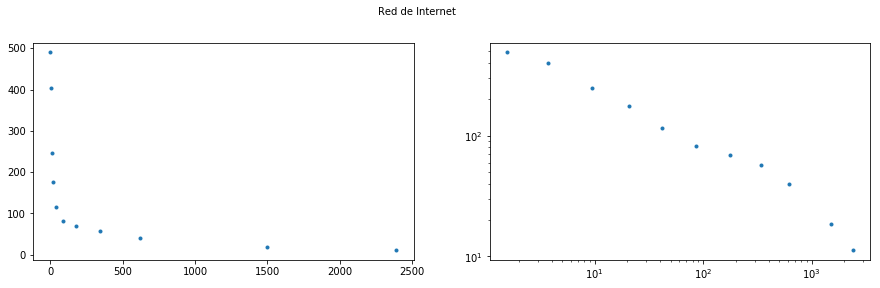

In [14]:
[ejexH,ejeyH]=bineologaritmico(H,degreeH,kmeanH,11)
plt.text(0.1,1000,'Red de Internet')

Text(0.1,1000,'Red de Internet')

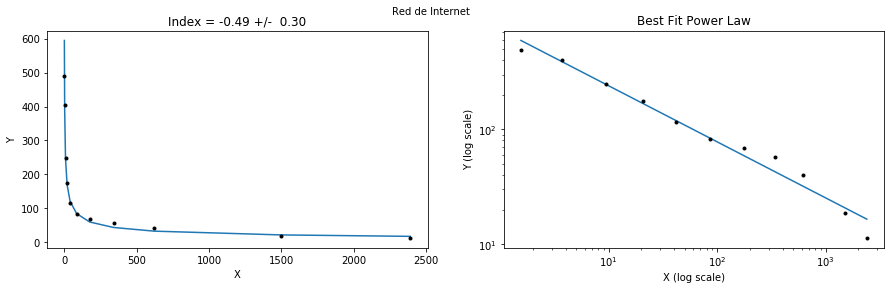

In [15]:
ajustelineal(ejexH,ejeyH)
plt.text(0.1,1000,'Red de Internet')

 # iv. Encuentre cuantitativamente la asortatividad de la red utilizando ahora el estimador propuesto por Newman.

La asortatividad indica la tendencia de los nodos a conctarse con otros que son "parecidos" (en un sentido determinado) a ellos mismos.
Resulta de particular interes la asortatividad por grado, donde "parecido" en este caso sería que dos nodos tuvieran grados similares. Además, se puede tener una red disortativa en el grado, donde los nodos se conectan con otros que tienen un grado no cercano al suyo.
Una forma de cuantificar la asortatividad por grado es utilizando el coeficiente de correlación definido de la siguiente forma:

$$r=\frac{\sum_{ij}(A_{ij}-k_{i}k_{j}/2m)k_{i}k_{j}}{\sum_{ij}(k_{i}\delta_{ij}-k_{i}k_{j}/2m)k_{i}k_{j}}$$

donde sucede que:

si $r>0$, la red es asortativa por grado
<br>
si $r<0$, la red es disortativa por grado

In [16]:
rG=nx.degree_assortativity_coefficient(G)
rH=nx.degree_assortativity_coefficient(H)
print(rG,rH)

0.461622466753 -0.198384875121


A partir de lo recien mencionado, concluimos que la red G es asortativa en el grado mientras que la red H es disortativa.

# Como se corresponde este coeficiente con el estimado en el punto anterior? A qué se debe?

A partir del ajuste lineal del gráfico ' grado vs  media de grado medio de primeros vecinos' en escala log log, uno puede determinar se una red es asortativa o disortativa (en el grado) a partir de la pendiente de dicho ajuste. En el caso de que la pendiente sea positiva, estariamos en el caso de asortatividad, y cuanto más parecida a 1.0 sea, mayor sera la misma. Por el otro lado, si la pendiente es negativa indicaría la disortatividad de una red, y esta será mayor cuanto mas cerca de -1.0 este la pendiente del ajuste.
<br>
Para las redes estudiadas obtuvimos cuantitativamente, por medio del estimador de Newman, lo que se apreciaba a partir de los ajustes realizados previamente.  

# (B) Corra el script de cálculo para las redes Y2H y AP-MS. Puede explicar lo que observa en cuanto a la asortatividad reportada?

In [17]:
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

def grafo(datosRed):
    G = nx.Graph()
    for i in range(np.shape(datosRed)[0]):
        G.add_edges_from([(datosRed[i][0],datosRed[i][1])])
    return G

In [18]:
redInteraccionesBinarias = ldata('yeast_Y2H.txt')
redComplejosProteicos = ldata('yeast_AP-MS.txt')
GY2H= grafo(redInteraccionesBinarias)
GAPMS= grafo(redComplejosProteicos)


Text(0.5,1,'Red de interacciones binarias')

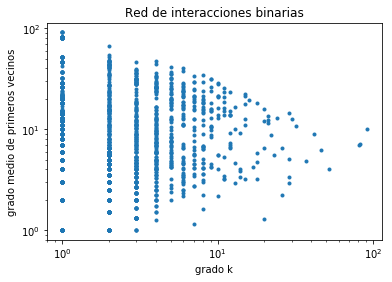

In [19]:
[degreeGY2H,kmeanGY2H]=gradoprimerosvecinos(GY2H)
plt.title('Red de interacciones binarias')

Text(0.5,1,'Red de copertenencia a complejos proteicos')

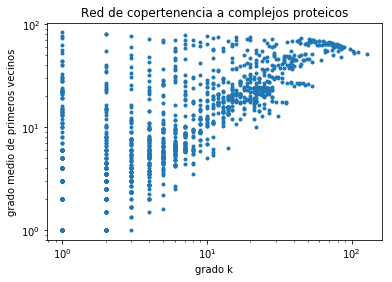

In [20]:
[degreeGAPMS,kmeanGAPMS]=gradoprimerosvecinos(GAPMS)
plt.title('Red de copertenencia a complejos proteicos')

Text(0.28,25,'Red de Internet')

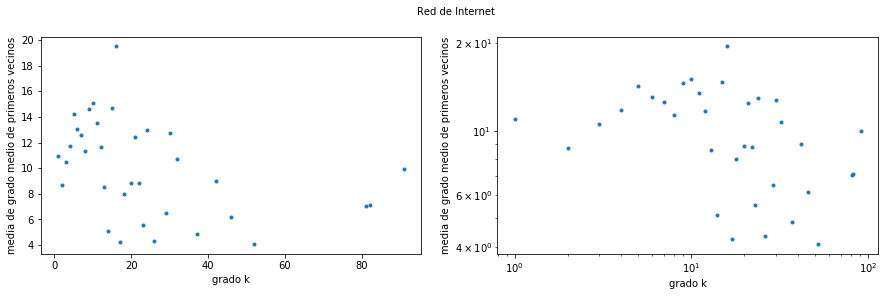

In [21]:
[degree_arr_intGY2H,kmmGY2H]=bineonormal(GY2H,degreeGY2H,kmeanGY2H)
plt.text(0.28,25,'Red de Internet')

Text(0.12,100,'Red de copertenencia a complejos proteicos')

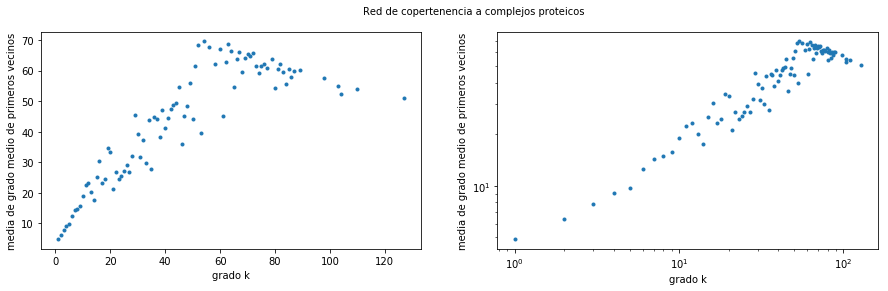

In [22]:
[degree_arr_intGAPMS,kmmGAPMS]=bineonormal(GAPMS,degreeGAPMS,kmeanGAPMS)
plt.text(0.12,100,'Red de copertenencia a complejos proteicos')

Text(0.12,130,'Red de copertenencia a complejos proteicos')

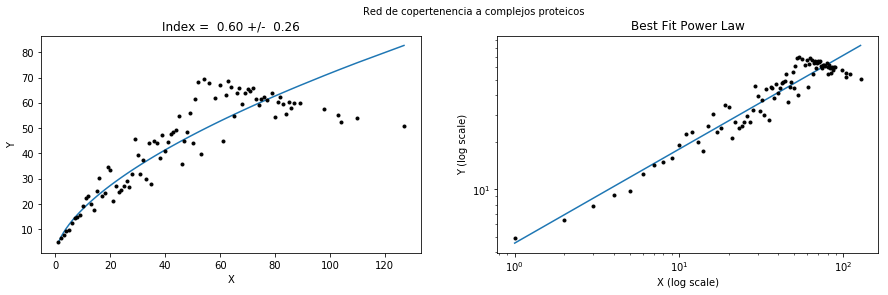

In [23]:
ajustelineal(degree_arr_intGAPMS,kmmGAPMS)
plt.text(0.12,130,'Red de copertenencia a complejos proteicos')

En este caso, esperariamos que las red APMS sea asortativas en el grado. Lo chequeamos a continuación:

In [25]:
rGAPMS=nx.degree_assortativity_coefficient(GAPMS)
print(rGAPMS)

0.605674218894


Text(0.3,30,'Red de Internet')

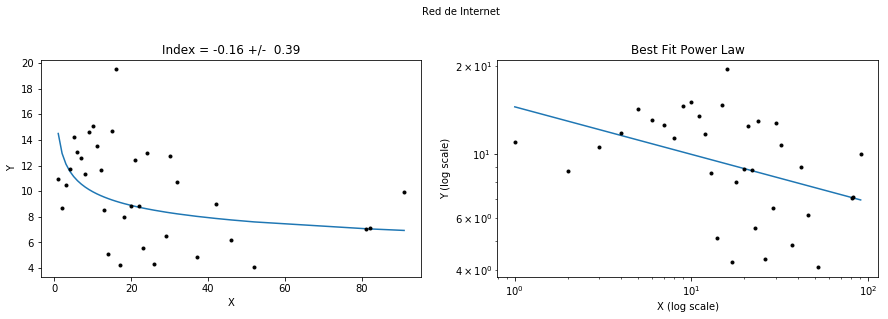

In [37]:
ajustelineal(degree_arr_intGY2H,kmmGY2H)
plt.text(0.30,30,'Red de Internet')

En este caso, aunque el ajuste no sea muy confiable, diriamos que la red tiene un cierto grado de disortatividad.

In [39]:
rGY2H=nx.degree_assortativity_coefficient(GY2H)
print(rGY2H)

-0.0550781093423
